In [1]:
import pandas as pd
import numpy as np
import scipy as sc
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from matplotlib.dates import DayLocator, DateFormatter

import datetime

import warnings
warnings.simplefilter(action='ignore')

## 1
–ó–∞–≥—Ä—É–∑–∏–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–∞–Ω–Ω—ã–µ. –ò–∑–Ω–∞—á–∞–ª—å–Ω–æ –∑–∞–¥—É–º—ã–≤–∞–ª–æ—Å—å –≤–∑—è—Ç—å –æ–±—ä–µ–º –¥–∞–Ω–Ω—ã—Ö –∑–∞ 2 –≥–æ–¥–∞, –Ω–æ —É—á–∏—Ç—ã–≤–∞—è –≤—Ä–µ–º—è–∑–∞—Ç—Ä–∞—Ç–Ω–æ—Å—Ç—å –ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏ SARIMAX –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ –æ—Ç–∫–∞–∑–∞—Ç—å—Å—è –æ—Ç —ç—Ç–æ–π –∏–¥–µ–∏. –ü–æ—ç—Ç–æ–º—É –≤–æ–∑—å–º–µ–º –¥–∞–Ω–Ω—ã–µ —Å –Ø–Ω–≤–∞—Ä—è –¥–æ –ò—é–Ω—è 2016 (–ò—é–Ω—å –º–µ—Å—è—Ü –ø—Ä–æ–≥–Ω–æ–∑–∞)

In [3]:
df_6=pd.read_csv("data/aggs/taxi_2016_06.csv")
df_5=pd.read_csv("data/aggs/taxi_2016_05.csv")
df_3=pd.read_csv("data/aggs/taxi_2016_03.csv")
df_4=pd.read_csv("data/aggs/taxi_2016_04.csv")
df_2=pd.read_csv("data/aggs/taxi_2016_02.csv")
df_1=pd.read_csv("data/aggs/taxi_2016_01.csv")
df=pd.concat([ df_1,df_2,df_3,df_4,df_5], axis=0)

df.head()

Unnamed: 0    1    2    3    4    5    6    7    8    9  ...  \
0  2016-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  2016-01-01 01:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2  2016-01-01 02:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  2016-01-01 03:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  2016-01-01 04:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   2491  2492  2493  2494  2495  2496  2497  2498  2499  2500  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2501 columns]

In [4]:
pred_region = df[['Unnamed: 0', '1231']].rename(columns={'Unnamed: 0': 'time'}).set_index('time')
pred_region.head(2)

1231
time                      
2016-01-01 00:00:00  938.0
2016-01-01 01:00:00  830.0

## 2
–ü–æ—Å—Ç—Ä–æ–∏–º –Ω–∞—à –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥. 

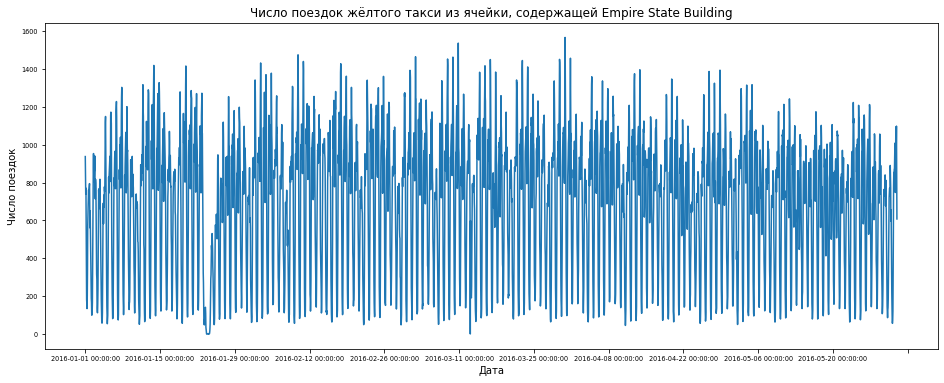

In [22]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(336)) # –≤—ã–≤–æ–¥ –¥–∞—Ç –∫–∞–∂–¥—ã–µ –¥–≤–µ –Ω–µ–¥–µ–ª–∏
ax.tick_params(which='major', labelsize=6.5)

ax.plot(pred_region.index, pred_region['1231'], color='tab:blue')
plt.gca().set(title="–ß–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫ –∂—ë–ª—Ç–æ–≥–æ —Ç–∞–∫—Å–∏ –∏–∑ —è—á–µ–π–∫–∏, —Å–æ–¥–µ—Ä–∂–∞—â–µ–π Empire State Building", xlabel="–î–∞—Ç–∞", ylabel="–ß–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫")
plt.show()



–í—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –∏–º–µ–µ—Ç –≤—ã—Ä–∞–∂–µ–Ω–Ω—É—é —Å—É—Ç–æ—á–Ω—É—é —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å, –∞ —Ç–∞–∫ –∂–µ –Ω–µ–∫–æ—Ç–æ—Ä—É—é –∞–Ω–æ–º–∞–ª–∏—é –≤–æ –≤—Ç–æ—Ä–æ–π –ø–æ–ª–æ–≤–∏–Ω–µ —è–Ω–≤–∞—Ä—è. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ STL –¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—é —Ä—è–¥–∞. –ë—É–¥–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –¥–≤—É–º–µ—Å—è—á–Ω—ã–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π –æ—Ç—Ä–µ–∑–æ–∫, —á—Ç–æ–±—ã –Ω–µ –ø–æ—Ç–µ—Ä—è—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω–æ—Å—Ç–∏ –≥—Ä–∞—Ñ–∏–∫–∞:

<Figure size 1152x504 with 0 Axes>

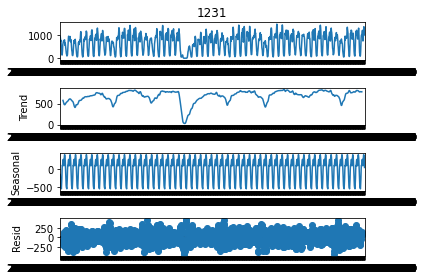

In [23]:
plt.figure(figsize=(16,7))
sm.tsa.seasonal_decompose(pred_region['1231'].iloc[:168*8], period=24).plot()
plt.show()

–í–∏–¥–Ω–æ, —á—Ç–æ –≤ –æ—Å—Ç–∞—Ç–∫–∞—Ö –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç —Å—Ç—Ä—É–∫—Ç—É—Ä–∞. –¢–∞–∫ –∂–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –Ω–µ–¥–µ–ª—å–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å. –ü–æ—ç—Ç–æ–º—É –¥–µ–ª–∞–µ–º –≤—ã–≤–æ–¥, —á—Ç–æ –Ω–∞—à –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Ä—è–¥ –Ω–µ—Å—Ç–∞—Ü–∏–æ–Ω–∞—Ä–µ–Ω.

## 3
–î–∞–ª–µ–µ –±—É–¥–µ–º —Å—Ç—Ä–æ–∏—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏—é –¥–ª—è —Ü–µ–ª–µ–≤–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ (–¥–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –æ—Ü–µ–Ω–∏—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã ARIMA). –í –ø–µ—Ä–≤—É—é –æ—á–µ—Ä–µ–¥—å —Å–æ–∑–¥–∞–¥–∏–º —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —É—á–µ—Ç–∞ –Ω–µ–¥–µ–ª—å–Ω–æ–π —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç–∏. 

In [5]:
w = 168
t=np.arange(1, pred_region.shape[0]+1)
pred_region['constant'] = np.ones(pred_region.shape[0]) # –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ–æ–±—Ö–æ–¥–∏–º –¥–ª—è –Ω–µ—Å–º–µ—â–µ–Ω–æ—Å—Ç–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞

for i in range(1,51):
    sin = 's_'+str(i)
    cos = 'c_'+str(i)
    pred_region[sin]= np.sin(2*i*np.pi*t/w)
    pred_region[cos]= np.cos(2*i*np.pi*t/w)

In [25]:
model = sm.OLS(pred_region['1231'], pred_region.drop(['1231'], axis=1)).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   1231   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     311.7
Date:                Fri, 08 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:06:39   Log-Likelihood:                -22470.
No. Observations:                3648   AIC:                         4.514e+04
Df Residuals:                    3547   BIC:                         4.577e+04
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant     691.4640      1.923    359.561      0.000     687.694     695.234
s_1          -72.0795      2.721    -26.485      0.000     -77.415     -66.744
c_1           64.6131      2.718     23.774      0.000      59.284      69.942
s_2           39.0983      2.718     14.387      0.000      33.770      44.426
c_2           -7.5907      2.722     -2.789      0.005     -12.927      -2.254
s_3          -28.5407      2.721    -10.489      0.000     -33.876     -23.206
c_3           -1.0384      2.718     -0.382      0.702      -6.368       4.291
s_4           26.9743      2.718      9.924      0.000      21.645      32.304
c_4           18.5921      2.721      6.833      0.000      13.257      23.927
s_5           -7.6077      2.720     -2.797      0.005     -12.941      -2.274
c_5          -46.0078      2.719    -16.921      0.000     -51.339     -40.677
s_6          -49.8101      2.719    -18.320      0.000     -55.141     -44.479
c_6           49.6048      2.720     18.235      0.000      44.271      54.938
s_7         -367.5458      2.720   -135.145      0.000    -372.878    -362.214
c_7          -66.4573      2.720    -24.436      0.000     -71.790     -61.125
s_8           62.7779      2.720     23.084      0.000      57.446      68.110
c_8           -0.9005      2.720     -0.331      0.741      -6.233       4.432
s_9           12.7864      2.719      4.702      0.000       7.455      18.118
c_9          -23.3674      2.720     -8.591      0.000     -28.701     -18.034
s_10          -7.8875      2.720     -2.900      0.004     -13.220      -2.555
c_10          -3.8796      2.719     -1.427      0.154      -9.211       1.452
s_11          15.9253      2.719      5.857      0.000      10.594      21.256
c_11           1.6733      2.720      0.615      0.539      -3.660       7.007
s_12         -28.3244      2.720    -10.414      0.000     -33.657     -22.992
c_12         -19.8201      2.719     -7.288      0.000     -25.152     -14.488
s_13          10.2039      2.719      3.753      0.000       4.873      15.535
c_13         108.6438      2.720     39.940      0.000     103.311     113.977
s_14        -139.0981      2.720    -51.146      0.000    -144.430    -133.766
c_14         157.4014      2.720     57.876      0.000     152.069     162.734
s_15         -12.0222      2.719     -4.421      0.000     -17.354      -6.690
c_15         -29.4805      2.720    -10.839      0.000     -34.813     -24.148
s_16         -17.2344      2.719     -6.338      0.000     -22.566     -11.903
c_16           4.7347      2.720      1.741      0.082      -0.598      10.068
s_17           6.4263      2.720      2.363      0.018       1.094      11.759
c_17           5.0800      2.720      1.868      0.062      -0.252      10.412
s_18           0.5773      2.719      0.212      0.832      -4.754       5.909
c_

–ö–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ summary —Å —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –≤—Å–µ –≤ –ø–æ—Ä—è–¥–∫–µ, R-squared:	0.898 –ø—Ä–∏–µ–º–ª–µ–º—ã–π. 

## 4
–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ç–µ–ø–µ—Ä—å –Ω–∞ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏:

In [27]:
resid = pd.DataFrame(model.resid, columns={'resid'})

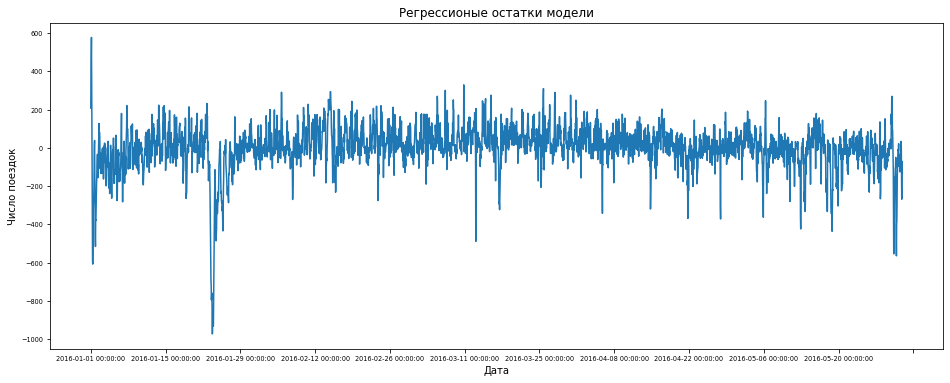

In [30]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(6)

ax.xaxis.set_major_locator(ticker.MultipleLocator(336)) # –≤—ã–≤–æ–¥ –¥–∞—Ç –∫–∞–∂–¥—ã–µ –¥–≤–µ –Ω–µ–¥–µ–ª–∏
ax.tick_params(which='major', labelsize=6.5)

ax.plot(resid.index, resid, color='tab:blue')
plt.gca().set(title="–†–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏ –º–æ–¥–µ–ª–∏", xlabel="–î–∞—Ç–∞", ylabel="–ß–∏—Å–ª–æ –ø–æ–µ–∑–¥–æ–∫")
plt.show()


–û—Å—Ç–∞—Ç–∫–∏ –±–µ–∑ –≤—ã—Ä–∞–∂–µ–Ω–Ω–æ–≥–æ —Ç—Ä–µ–Ω–¥–∞. –ß–µ—Ç–∫–æ –≤–∏–¥–Ω—ã –∞–Ω–æ–º–∞–ª–∏–∏ (–æ–¥–Ω–∞ –≤–æ –≤—Ç–æ—Ä–æ–π —Å–µ—Ä–µ–¥–∏–Ω–µ —è–Ω–≤–∞—Ä—è, –¥—Ä—É–≥–∞—è –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –º–∞—Ä—Ç–∞). –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ STL-–¥–µ–∫–æ–º–ø–æ–∑–∏—Ü–∏—é. 

<Figure size 720x504 with 0 Axes>

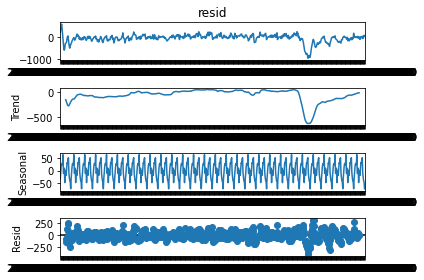

In [36]:
sm.tsa.seasonal_decompose(resid['resid'].iloc[:168*4], period=24).plot()
plt.show()

In [37]:
print('–ö—Ä–∏—Ç–µ—Ä–∏–π –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞ —Å –∫–æ–Ω—Å—Ç–∞–Ω—Ç–æ–π =', round(adfuller(resid['resid'])[1], 4))

–ö—Ä–∏—Ç–µ—Ä–∏–π –î–∏–∫–∏-–§—É–ª–ª–µ—Ä–∞ —Å –∫–æ–Ω—Å—Ç–∞–Ω—Ç–æ–π = 0.0


–ü–æ—Å–º–æ—Ç—Ä–∏–º —Ç–µ–ø–µ—Ä—å –Ω–∞ –æ—Å—Ç–∞—Ç–∫–∏, –ø—Ä–æ–¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–æ —Å–µ–∑–æ–Ω—É:

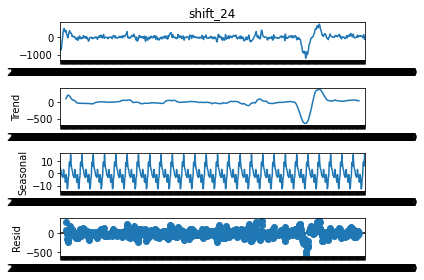

In [41]:
resid['shift_24'] = resid['resid']-resid['resid'].shift(24)
sm.tsa.seasonal_decompose(resid['shift_24'].iloc[25:168*4], period=24).plot()
plt.show()

–í —Ü–µ–ª–æ–º, —Å–∏–ª—å–Ω–æ –±–æ–ª—å—à–æ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è –Ω–µ –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è, –ø–æ—ç—Ç–æ–º—É –¥–ª—è –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –º–æ–∂–µ–º –æ—Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –Ω–∞ —ç—Ç–æ–º –∏ –Ω–µ —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ, –ø–æ—Å–∫–æ–ª—å–∫—É –æ–Ω–æ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–≤–µ–ª–∏—á–∏—Ç –≤—Ä–µ–º—è –Ω–∞ –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

## 5
–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∏ —á–∞—Å—Ç–∏—á–Ω—ã–π –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏:

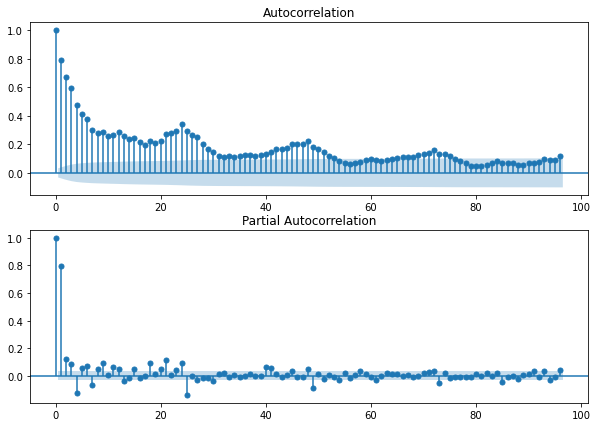

In [46]:
plt.figure(figsize=(10, 7)) 
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(resid['resid'].values.squeeze(), lags=96, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(resid['resid'].values.squeeze(), lags=96, ax=ax)
plt.show()

–ü–æ –≥—Ä–∞—Ñ–∏–∫—É –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –º–æ–∂–µ–º —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥, —á—Ç–æ –Ω–µ–¥–µ–ª—å–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤ –æ—Å—Ç–∞—Ç–∫–∞—Ö, —Ç–∞–∫ –∂–µ –∫–∞–∫ –∏ —Ç—Ä–µ–Ω–¥. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ–¥–æ–±—Ä–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, –¥–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –º–æ–¥–µ–ª—å. –î–ª—è —ç–∫–æ–Ω–æ–º–∏–∏ –≤—Ä–µ–º–µ–Ω–∏, –Ω–∞—á–∞–ª—å–Ω—ã–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—è –≤—ã–±–µ—Ä–µ–º —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º: q=3, Q=2, p=1, P=1. –ü–æ–ª–Ω—ã–π –ø–µ—Ä–µ–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∏ –∏—Ö –æ—Ü–µ–Ω–∫–∞ –æ—Å—É—â–µ—Å—Ç–≤–ª—è–ª–∞—Å—å –≤ –¥—Ä—É–≥–æ–º –Ω–æ—É—Ç–±—É–∫–µ, –∏ –∑–∞–Ω—è–ª–∞ –ø–æ—Ä—è–¥–∫–∞ 9 —á–∞—Å–æ–≤. –°—é–¥–∞ –≤—ã–ø–∏—à–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—É—é —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø–µ—Ä–µ–±–æ—Ä–∞ –∏ —É–∂–µ –∏—Ç–æ–≥–æ–≤—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

In [2]:
def sarimax_gridsearch(ts, exog, par, d=0, D=0, s=24, maxiter=30, freq='H'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by AIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best AIC value
    i = 0
    ans = []
    for comb in par:
        print('Step: ', i+1, 'par :', comb)
        try:
            
            model = sm.tsa.statespace.SARIMAX(ts, exog,
                                                order=(comb[0],d,comb[1]),
                                                seasonal_order=(comb[2],D, comb[3],s),
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

            output = model.fit(maxiter=maxiter, method='nm', disp=-1)#, low_memory=True)
            print('Success')
            i+=1
            ans.append([comb,output.aic])
            
            print('SARIMAX {} x {}12 : AIC Calculated ={}'.format(comb, output.aic))
            
        except:
            print('Fail')
            i+=1
            continue

    # Find the parameters with minimal AIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pqPQ', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:10]
    
    return ans_df

## 6
–ù–∞–∏–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç –±—ã–ª –ø–æ–ª—É—á–µ–Ω –¥–ª—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ q=3, Q=2, p=1, P=1, —Ç.–µ. –Ω–∞—à–µ –Ω–∞—á–∞–ª—å–Ω–æ–æ–µ –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ –ø–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏. –ï—Å—Ç—å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å, —á—Ç–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –±—ã–ª–∏ –æ—Ü–µ–Ω–µ–Ω—ã —Å–ª–∏—à–∫–æ–º –≥—Ä—É–±–æ. –¢–µ–º –Ω–µ –º–µ–Ω–µ–µ –±—É–¥–µ–º –∞–Ω–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –¥–∞–Ω–Ω—É—é –º–æ–¥–µ–ª—å:

In [6]:
p, q, P, Q, d, D = 1, 3, 1, 2, 0, 0
s=24
ex = pred_region.drop(['1231'], axis=1)

In [7]:
%%time
mod = sm.tsa.statespace.SARIMAX(pred_region['1231'],exog=ex, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False,freq='H').fit(disp=False)

Wall time: 34min 56s


In [8]:
print(mod.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                    1231   No. Observations:                 3648
Model:             SARIMAX(1, 0, 3)x(1, 0, [1, 2], 24)   Log Likelihood              -20049.834
Date:                                 Fri, 08 Apr 2022   AIC                          40317.667
Time:                                         17:56:57   BIC                          40992.113
Sample:                                     01-01-2016   HQIC                         40558.038
                                          - 05-31-2016                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
constant     691.5182     30.185     22.910      0.000     632.358     750

## 7
–ü–æ—Å—Ç—Ä–æ–∏–º –Ω–∞—à–∏ –¥–∞–Ω–Ω—ã–µ —Å –ø—Ä–æ–≥–Ω–æ–∑–∞–º–∏ –º–æ–¥–µ–ª–∏:

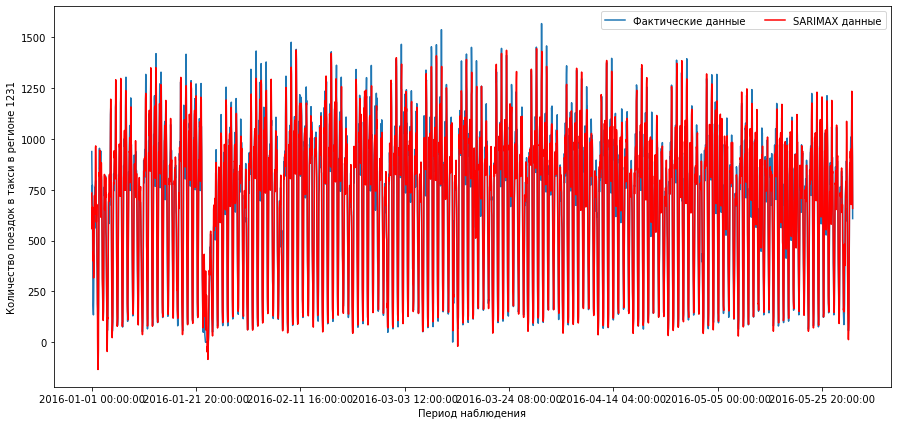

In [9]:
plt.figure(figsize=(15,7))
plot1 = pred_region['1231'].plot()
plot2 = mod.fittedvalues.plot(color='r')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫ –≤ —Ç–∞–∫—Å–∏ –≤ —Ä–µ–≥–∏–æ–Ω–µ 1231')
plt.xlabel('–ü–µ—Ä–∏–æ–¥ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è')
plt.legend( ['–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ', 'SARIMAX –¥–∞–Ω–Ω—ã–µ'], loc=1, ncol = 2, prop={'size':10})
plt.show()
warnings.filterwarnings('default')

–ù–∞ –≤–∏–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –¥–æ–≤–æ–ª—å–Ω–æ –Ω–µ–ø–ª–æ—Ö–æ–π. –ü–æ—Å—Ç—Ä–æ–∏–º –æ—Å–Ω–æ–≤–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏, —á—Ç–æ–±—ã —á–∏—Å–ª–µ–Ω–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –£ –º–æ–¥–µ–ª–∏ –ø–µ—Ä–≤—ã–µ $\max{\{(P+D)s+p+d, Qs+q}\}$ –ø—Ä–æ–≥–Ω–æ–∑–æ–≤ –Ω–µ —è–≤–ª—è—é—Ç—Å—è –Ω–∞–¥–µ–∂–Ω—ã–º–∏ (–ø–æ–¥—Ä–æ–±–Ω–µ–µ https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_sarimax_faq.html) –∏ –Ω–∞ –Ω–∏—Ö –æ–±—Ä–∞—â–∞—Ç—å –≤–Ω–∏–º–∞–Ω–∏—è –Ω–µ —Å—Ç–æ–∏—Ç.

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

def show_metrics(y_t, y_p):
    print('MSE: {:.2f}'.format(mean_squared_error(y_t, y_p)))
    print('mean_absolute_error: {:.2f}'.format(mean_absolute_error(y_t, y_p)))
    print('r2_score: {:.2f}'.format(r2_score(y_t, y_p)))

In [71]:
max_ex = max((ùëÉ+ùê∑)*ùë†+ùëù+ùëë,ùëÑ*ùë†+ùëû)
show_metrics(pred_region['1231'][max_ex+1:].values, mod.fittedvalues[max_ex+1:].values)

MSE: 4072.71
mean_absolute_error: 46.34
r2_score: 0.97


## –ü—Ä–æ–≥–Ω–æ–∑

–ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –∏—é–Ω—å 2016 –≥–æ–¥–∞ –∏ —Å—Ä–∞–≤–Ω–∏—Ç—å —Å —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–º–∏ –¥–∞–Ω–Ω—ã–º–∏. –î–ª—è –Ω–∞—á–∞–ª–∞ —Å–æ–∑–¥–∞–¥–∏–º –æ–±–æ–±—â–µ–Ω–Ω—ã–π –¥–∞—Ç–∞—Å–µ—Ç, —Å –¥–æ–±–∞–≤–ª–µ–Ω–Ω—ã–º –º–µ—Å—è—Ü–µ–º.

In [6]:
all_data =pd.concat([df,df_6], axis=0)
all_pred_region = all_data[['Unnamed: 0', '1231']].rename(columns={'Unnamed: 0': 'time'}).set_index('time')
all_pred_region.index = pd.to_datetime(all_pred_region.index)

–¢–µ–ø–µ—Ä—å –ø–æ—Å—Ç—Ä–æ–∏–º —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –∞–Ω–∞–ª–æ–≥–∏—á–Ω–æ —Ç–æ–º—É, –∫–∞–∫ –º—ã —Å—Ç—Ä–æ–∏–ª–∏ –¥–ª—è –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞. 

In [7]:
w = 168
t=np.arange(1, all_pred_region.shape[0]+1)
all_pred_region['constant'] = np.ones(all_pred_region.shape[0]) # –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ–æ–±—Ö–æ–¥–∏–º –¥–ª—è –Ω–µ—Å–º–µ—â–µ–Ω–æ—Å—Ç–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞

for i in range(1,51):
    sin = 's_'+str(i)
    cos = 'c_'+str(i)
    all_pred_region[sin]= np.sin(2*i*np.pi*t/w)
    all_pred_region[cos]= np.cos(2*i*np.pi*t/w)

all_ex = all_pred_region.drop(['1231'], axis=1) # –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –≤—ã–¥–µ–ª–∏–º —ç–∫–∑–æ–≥–µ–Ω–Ω—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ

In [14]:
%%time
predict=mod.get_prediction(start=datetime.datetime.strptime("2016-01-01 00:00:00", "%Y-%m-%d %H:%M:%S"), 
                                         end=datetime.datetime.strptime("2016-06-30 23:00:00", "%Y-%m-%d %H:%M:%S"), 
                                         dynamic=False,  exog=all_ex[3648:])

Wall time: 284 ms


In [16]:
predict_conf_int = predict.conf_int() # –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–æ–≤
ci=predict_conf_int.loc['2016-01-01':,] 
pred_means = predict.predicted_mean # –∑–∞ –ø—Ä–æ–≥–Ω–æ–∑ –≤–æ–∑—å–º–µ–º —Å—Ä–µ–¥–Ω–µ–µ –ø–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º 

–ü–æ—Å—Ç—Ä–æ–∏–º –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ —Ñ–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ, –ø—Ä–æ–≥–Ω–æ–∑ –Ω–∞ –∏—é–Ω—å 2016 –≥–æ–¥–∞ –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã:

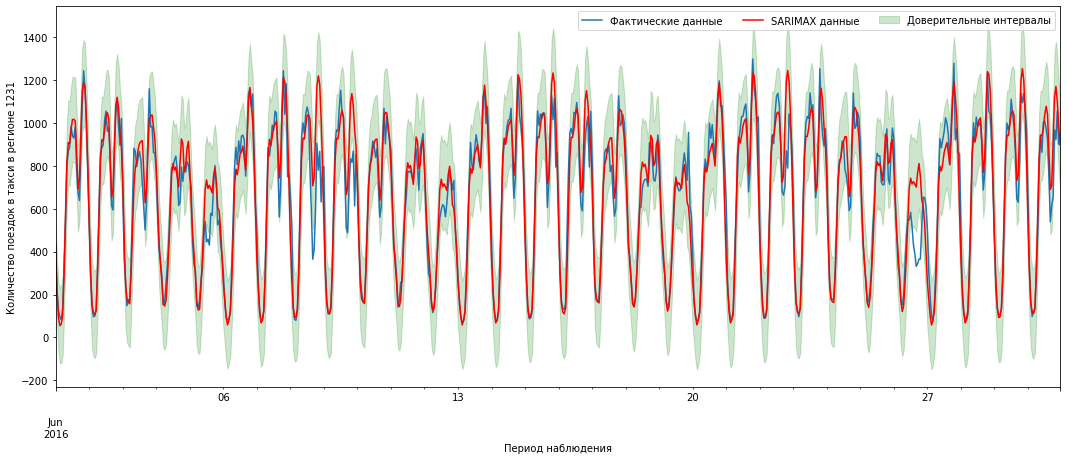

In [18]:
plt.figure(figsize=(18,7))

plot1 = all_pred_region['1231'][3648:].plot()
plot2 = pred_means[3648:].plot(color='r')
plot3 = plt.fill_between(ci.iloc[3648:,0].index, ci.iloc[3648:,0].values, ci.iloc[3648:,1].values, color='g', alpha=0.2)


plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫ –≤ —Ç–∞–∫—Å–∏ –≤ —Ä–µ–≥–∏–æ–Ω–µ 1231')
plt.xlabel('–ü–µ—Ä–∏–æ–¥ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è')
plt.legend( ['–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ', 'SARIMAX –¥–∞–Ω–Ω—ã–µ', '–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã'], loc=1, ncol = 3, prop={'size':10})

plt.show()


–ú–µ—Ç—Ä–∏–∫–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ (–∑–∞ –∏—é–Ω—å):

In [407]:
show_metrics(all_pred_region['1231'][3648:].values, pred_means[3648:].values)

MSE: 9630.87
mean_absolute_error: 65.18
r2_score: 0.91


## 8
### –ò—Ç–æ–≥–∏ –ø–µ—Ä–≤–æ–π –º–æ–¥–µ–ª–∏ SARIMAX

–í –¥–∞–Ω–Ω—ã—Ö –≤–∏–¥–Ω–∞ —á–µ—Ç–∫–∞—è –Ω–µ–¥–µ–ª—å–Ω–∞—è —Å–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (–∞ –∏–º–µ–Ω–Ω–æ, –≤ –≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –º–µ–Ω—å—à–µ –ø–æ–µ–∑–¥–æ–∫), –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∞—à –ø—Ä–æ–≥–Ω–æ–∑ –±–æ–ª–µ–µ –æ–ø—Ç–∏–º–∏—Å—Ç–∏—á–Ω—ã–π. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º —Å–ª–µ–¥—É–µ—Ç –¥–æ–±–∞–≤–∏—Ç—å —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—ã—Ö–æ–¥–Ω—ã—Ö –¥–Ω–µ–π. –¢–∞–∫–∂–µ –º–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å, —á—Ç–æ –±–æ–ª—å—à–µ –≤—ã–∑–æ–≤–æ–≤ —Ç–∞–∫—Å–∏ –≤ –≤–µ—á–µ—Ä–Ω–µ–µ –≤—Ä–µ–º—è (–æ—Å–Ω–æ–≤–Ω—ã–µ –ø–∏–∫–∏ –ø—Ä–∏—Ö–æ–¥—è—Ç—Å—è –∫–∞–∫ —Ä–∞–∑ –Ω–∞ –Ω–∏—Ö). –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ —Ç–æ, —á—Ç–æ –º–æ–¥–µ–ª—å –∏–º–µ–µ—Ç –Ω–µ–ø–ª–æ—Ö—É—é –ø—Ä–æ–≥–Ω–æ–∑–Ω—É—é —Å–∏–ª—É, –µ–µ –º–æ–∂–Ω–æ –ø–æ–ø—ã—Ç–∞—Ç—å—Å—è —É–ª—É—á—à–∏—Ç—å –¥–æ–±–∞–≤–∏–≤ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. 

In [23]:
df_6=pd.read_csv("data/aggs/taxi_2016_06.csv")
df_5=pd.read_csv("data/aggs/taxi_2016_05.csv")
df_3=pd.read_csv("data/aggs/taxi_2016_03.csv")
df_4=pd.read_csv("data/aggs/taxi_2016_04.csv")
df_2=pd.read_csv("data/aggs/taxi_2016_02.csv")
df_1=pd.read_csv("data/aggs/taxi_2016_01.csv")
df=pd.concat([ df_1,df_2,df_3,df_4,df_5], axis=0)
new_pred_region = df[['Unnamed: 0', '1231']].rename(columns={'Unnamed: 0': 'time'}).set_index('time')
new_pred_region.index = pd.to_datetime(new_pred_region.index)
new_pred_region['constant'] = np.ones(new_pred_region.shape[0])

In [24]:
new_pred_region['is_weekends'] = np.array((new_pred_region.index.weekday==6)|(new_pred_region.index.weekday==5)) # —Å–æ–∑–¥–∞–¥–∏–º –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä –≤—ã—Ö–æ–¥–Ω—ã—Ö

hol_list = ['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30'] # –º–∞—Å—Å–∏–≤ —Å –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∞–∑–¥–Ω–∏–∫–∞–º–∏
x = np.array([True if str(i).split()[0] in hol_list else False for i in new_pred_region.index]) 

new_pred_region['is_weekends'] = np.array(new_pred_region['is_weekends']) + x # –¥–æ–±–∞–≤–∏–º –∫ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞–º –≤—ã—Ö–æ–¥–Ω—ã—Ö –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã –ø—Ä–∞–∑–¥–Ω–∏–∫–æ–≤
new_pred_region['is_weekends'] = new_pred_region['is_weekends'].astype(int)

new_pred_region['is_evening'] = np.array((new_pred_region.index.hour == 19)|(new_pred_region.index.hour == 20), dtype=int) # –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä –≤–µ—á–µ—Ä–∞ 
new_pred_region['is_anomaly'] = np.array((new_pred_region.index.month == 1)&(new_pred_region.index.day == 23), dtype=int) # –∏–Ω–¥–∏–∫–∞–∫—Ç–æ—Ä –∞–Ω–æ–º–∞–ª–∏–∏ (23 —è–Ω–≤–∞—Ä—è 2016 –±—ã–ª–∞ —Å–Ω–µ–∂–Ω–∞—è –±—É—Ä—è –≤ –ù—å—é-–ô–æ—Ä–∫–µ)

In [25]:
new_pred_region['trend_comp'] = np.arange(1, new_pred_region.shape[0]+1)**2/(new_pred_region.shape[0]+1) # –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ 

w = 168
t=np.arange(1, new_pred_region.shape[0]+1)
 # –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ–æ–±—Ö–æ–¥–∏–º –¥–ª—è –Ω–µ—Å–º–µ—â–µ–Ω–æ—Å—Ç–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞

for i in range(1,61):
    sin = 's_'+str(i)
    cos = 'c_'+str(i)
    new_pred_region[sin]= np.sin(2*i*np.pi*t/w)
    new_pred_region[cos]= np.cos(2*i*np.pi*t/w)

In [376]:
new_model = sm.OLS(new_pred_region['1231'], new_pred_region.drop(['1231'], axis=1)).fit()

In [ ]:
new_model.summary()

In [378]:
new_resid = pd.DataFrame(new_model.resid, columns={'resid'})

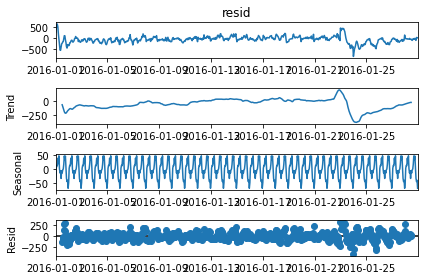

In [380]:
sm.tsa.seasonal_decompose(new_resid['resid'].iloc[:168*4], period=24).plot()
plt.show()

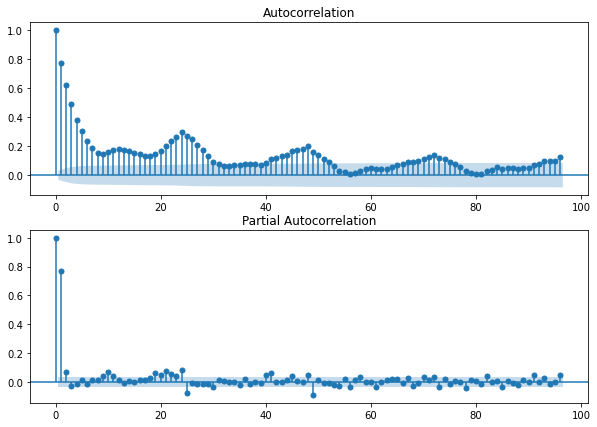

In [381]:
plt.figure(figsize=(10, 7)) 
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(new_resid['resid'].values.squeeze(), lags=96, ax=ax)

ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(new_resid['resid'].values.squeeze(), lags=96, ax=ax)
plt.show()

In [7]:
new_ex = new_pred_region.drop(['1231'], axis=1)

–ü—Ä–∏ –ø–µ—Ä–µ–±–æ—Ä–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –∞–Ω–∞–ª–æ–≥–∏—á–Ω—ã–º –Ω–∞—á–∞–ª—å–Ω—ã–º –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏–µ–º, –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –æ–∫–∞–∑–∞–ª–∏—Å—å —Ç–µ –∂–µ —Å–∞–º—ã–µ, —á—Ç–æ –∏ –¥–ª—è –ø—Ä–æ—à–ª–æ–π –º–æ–¥–µ–ª–∏ (—á—Ç–æ –≤–µ—Ä–æ—è—Ç–Ω–æ –æ–ø—è—Ç—å —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –ø–ª–æ—Ö–æ–º—É –Ω–∞—á–∞–ª—å–Ω–æ–º—É –ø—Ä–∏–±–ª–∏–∂–µ–Ω–∏—é). –ë–æ–ª–µ–µ —Ç–æ–≥–æ, –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ç–µ—Ö –∂–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞—Ö, –Ω–æ —Å —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω—ã–º–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏, –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ —É–ª—É—á—à–∏–ª–∏—Å—å, –∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º —É—Ö—É–¥—à–∏–ª–∏—Å—å (–∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –±—É–¥—É—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω—ã –Ω–∏–∂–µ), —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏–∏. –ü–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç –º–æ–¥–µ–ª—å —Å –¥—Ä—É–≥–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏, –∫–æ—Ç–æ—Ä—ã–µ –±–æ–ª–µ–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –≥—Ä–∞—Ñ–∏–∫–∞–º –∞–≤—Ç–æ–∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π, –Ω–æ —è–≤–Ω–æ —É–≤–µ–ª–∏—á–∞—Ç –≤—Ä–µ–º—è –æ–±—É—á–µ–Ω–∏—è.  

In [10]:
p, q, P, Q, d, D = 1, 5, 1, 3, 0, 0
s=24

In [11]:
%%time
mod = sm.tsa.statespace.SARIMAX(new_pred_region['1231'],exog=new_ex, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s),
                                       enforce_stationarity=False,
                                       enforce_invertibility=False,freq='H').fit(disp=False)

Wall time: 3h 3min 26s


In [13]:
print(mod.summary())

                                         SARIMAX Results                                          
Dep. Variable:                                       1231   No. Observations:                 3648
Model:             SARIMAX(1, 0, 5)x(1, 0, [1, 2, 3], 24)   Log Likelihood              -19798.046
Date:                                    Sat, 09 Apr 2022   AIC                          39868.093
Time:                                            13:16:42   BIC                          40708.616
Sample:                                        01-01-2016   HQIC                         40167.764
                                             - 05-31-2016                                         
Covariance Type:                                      opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
constant      733.8704     21.103     34.775    

In [16]:
max_ex_new = max((ùëÉ+ùê∑)*ùë†+ùëù+ùëë,ùëÑ*ùë†+ùëû)

In [17]:
show_metrics(new_pred_region['1231'][max_ex_new+1:].values, mod.fittedvalues[max_ex_new+1:].values)

MSE: 3832.62
mean_absolute_error: 44.25
r2_score: 0.97


In [392]:
# –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ p, q, P, Q, d, D = 1, 3, 1, 2, 0, 0 (–∫–∞–∫ —É –º–æ–¥–µ–ª–∏ –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤)
# –Ω–µ –∑–∞–ø—É—Å–∫–∞—Ç—å —è—á–µ–π–∫—É, —Ç–∞–∫ –∫–∞–∫ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —É–∂–µ –ø–µ—Ä–µ–∑–∞–ø–∏—Å–∞–Ω—ã
show_metrics(new_pred_region['1231'][max_ex+1:].values, mod.fittedvalues[max_ex+1:].values)

MSE: 3833.52
mean_absolute_error: 44.26
r2_score: 0.97


## –ü—Ä–æ–≥–Ω–æ–∑ –ø–æ–ª–Ω–æ–≥–æ –Ω–æ–≤–æ–≥–æ –¥–∞—Ç–∞—Å–µ—Ç–∞:

In [28]:
new_all_data =pd.concat([df,df_6], axis=0)
new_all_pred_region = new_all_data[['Unnamed: 0', '1231']].rename(columns={'Unnamed: 0': 'time'}).set_index('time')
new_all_pred_region.index = pd.to_datetime(new_all_pred_region.index)

new_all_pred_region['constant'] = np.ones(new_all_pred_region.shape[0])
new_all_pred_region['is_weekends'] = np.array((new_all_pred_region.index.weekday==6)|(new_all_pred_region.index.weekday==5)) # —Å–æ–∑–¥–∞–¥–∏–º –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä –≤—ã—Ö–æ–¥–Ω—ã—Ö

hol_list = ['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30'] # –º–∞—Å—Å–∏–≤ —Å –Ω–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–º–∏ –ø—Ä–∞–∑–¥–Ω–∏–∫–∞–º–∏
x = np.array([True if str(i).split()[0] in hol_list else False for i in new_all_pred_region.index]) 

new_all_pred_region['is_weekends'] = np.array(new_all_pred_region['is_weekends']) + x # –¥–æ–±–∞–≤–∏–º –∫ –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–∞–º –≤—ã—Ö–æ–¥–Ω—ã—Ö –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã –ø—Ä–∞–∑–¥–Ω–∏–∫–æ–≤
new_all_pred_region['is_weekends'] = new_all_pred_region['is_weekends'].astype(int)

new_all_pred_region['is_evening'] = np.array((new_all_pred_region.index.hour == 19)|(new_all_pred_region.index.hour == 20), dtype=int) # –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä –≤–µ—á–µ—Ä–∞
new_all_pred_region['is_anomaly'] = np.array((new_all_pred_region.index.month == 1)&(new_all_pred_region.index.day == 23), dtype=int) # –∏–Ω–¥–∏–∫–∞–∫—Ç–æ—Ä –∞–Ω–æ–º–∞–ª–∏–∏ (23 —è–Ω–≤–∞—Ä—è 2016 –±—ã–ª–∞ —Å–Ω–µ–∂–Ω–∞—è –±—É—Ä—è –≤ –ù—å—é-–ô–æ—Ä–∫–µ)
new_all_pred_region['trend_comp'] = np.arange(1, new_all_pred_region.shape[0]+1)**2/(new_all_pred_region.shape[0]+1) # –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ –≤—Ä–µ–º–µ–Ω–∏ 

w = 168
t=np.arange(1, new_all_pred_region.shape[0]+1)
 # –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ–æ–±—Ö–æ–¥–∏–º –¥–ª—è –Ω–µ—Å–º–µ—â–µ–Ω–æ—Å—Ç–∏ –ø—Ä–æ–≥–Ω–æ–∑–∞

for i in range(1,61):
    sin = 's_'+str(i)
    cos = 'c_'+str(i)
    new_all_pred_region[sin]= np.sin(2*i*np.pi*t/w)
    new_all_pred_region[cos]= np.cos(2*i*np.pi*t/w)
    
new_all_ex = new_all_pred_region.drop(['1231'], axis=1)

In [19]:
%%time
new_predict=mod.get_prediction(start=datetime.datetime.strptime("2016-01-01 00:00:00", "%Y-%m-%d %H:%M:%S"), 
                                         end=datetime.datetime.strptime("2016-06-30 23:00:00", "%Y-%m-%d %H:%M:%S"), 
                                         dynamic=False,  exog=new_all_ex[3648:])

Wall time: 1.63 s


In [21]:
predict_conf_int_new = new_predict.conf_int() # –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–æ–≤
ci_new=predict_conf_int_new.loc['2016-01-01':,] 
pred_means_new = new_predict.predicted_mean # –∑–∞ –ø—Ä–æ–≥–Ω–æ–∑ –≤–æ–∑—å–º–µ–º —Å—Ä–µ–¥–Ω–µ–µ –ø–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º 

### –ü—Ä–æ–≥–Ω–æ–∑ –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ SARIMAX

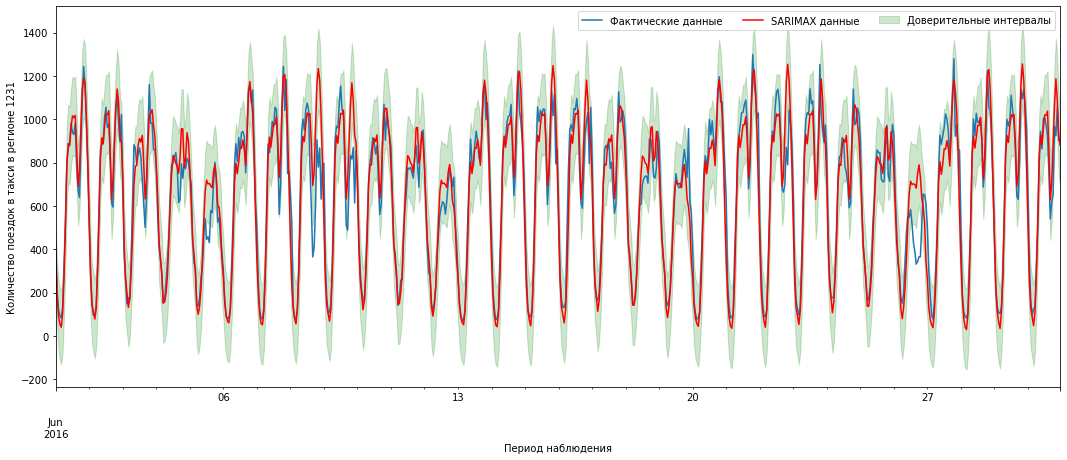

In [22]:
plt.figure(figsize=(18,7))

plot1 = new_all_pred_region['1231'][3648:].plot()
plot2 = pred_means_new[3648:].plot(color='r')
plot3 = plt.fill_between(ci_new.iloc[3648:,0].index, ci_new.iloc[3648:,0].values, ci_new.iloc[3648:,1].values, color='g', alpha=0.2)


plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–µ–∑–¥–æ–∫ –≤ —Ç–∞–∫—Å–∏ –≤ —Ä–µ–≥–∏–æ–Ω–µ 1231')
plt.xlabel('–ü–µ—Ä–∏–æ–¥ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è')
plt.legend( ['–§–∞–∫—Ç–∏—á–µ—Å–∫–∏–µ –¥–∞–Ω–Ω—ã–µ', 'SARIMAX –¥–∞–Ω–Ω—ã–µ', '–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã'], loc=1, ncol = 3, prop={'size':10})

plt.show()


In [23]:
show_metrics(new_all_pred_region['1231'][3648:].values, pred_means_new[3648:].values)

MSE: 10224.54
mean_absolute_error: 70.45
r2_score: 0.90


In [410]:
# –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ —Å –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ p, q, P, Q, d, D = 1, 3, 1, 2, 0, 0 (–∫–∞–∫ —É –º–æ–¥–µ–ª–∏ –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤)
# –Ω–µ –∑–∞–ø—É—Å–∫–∞—Ç—å —è—á–µ–π–∫—É, —Ç–∞–∫ –∫–∞–∫ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ —É–∂–µ –ø–µ—Ä–µ–∑–∞–ø–∏—Å–∞–Ω—ã
show_metrics(new_all_pred_region['1231'][3648:].values, pred_means_new[3648:].values)

MSE: 10234.78
mean_absolute_error: 70.53
r2_score: 0.90


### –ë–æ–Ω—É—Å
–ü–µ—Ä–µ–¥ –æ—Å–Ω–æ–≤–Ω—ã–º –≤—ã–≤–æ–¥–æ–º, –±–æ–Ω—É—Å–æ–º –æ–±—É—á–∏–º –ø—Ä–æ—Å—Ç—ã–µ –ª–∏–Ω–µ–π–Ω—ã–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è –Ω–∞ —Ç–µ—Ö –∂–µ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö:

In [44]:
mod_OLS = sm.OLS(all_pred_region['1231'][:3648], all_ex[:3648]).fit()

In [50]:
show_metrics(all_pred_region['1231'][:3648], mod_OLS.fittedvalues.values)

MSE: 13111.85
mean_absolute_error: 73.09
r2_score: 0.90


In [46]:
show_metrics(all_pred_region['1231'][3648:], mod_OLS.predict(all_ex[3648:]))

MSE: 12064.98
mean_absolute_error: 72.79
r2_score: 0.88


–¢–µ–ø–µ—Ä—å –æ–±—É—á–∏–º —Ä–µ–≥—Ä–µ—Å—Å–∏—é –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–µ —Å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏:

In [41]:
mod_OLS_reg = sm.OLS(new_all_pred_region['1231'][:3648], new_all_ex[:3648]).fit()

In [42]:
show_metrics(new_all_pred_region['1231'][:3648], mod_OLS_reg.fittedvalues.values)

MSE: 10540.81
mean_absolute_error: 69.51
r2_score: 0.92


In [43]:
show_metrics(new_all_pred_region['1231'][3648:], mod_OLS_reg.predict(new_all_ex[3648:]))

MSE: 10891.41
mean_absolute_error: 72.97
r2_score: 0.89


## –í—ã–≤–æ–¥

–ú–æ–¥–µ–ª–∏ SARIMAX (p, q, P, Q) –∏ SARIMAX_reg (p, q, P, Q) (—Å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–º–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏): 

metric(train/test)|SARIMAX (1, 3, 1, 2)|SARIMAX_reg (1, 3, 1, 2)| SARIMAX_reg (1, 5, 1, 3)| OLS | OLS_reg 
---|---|---|---|---|---
MSE| 4072.71/9630.87 | 3833.52/10234.78 | 3832.62/10224.54 | 13111.85/12064.98 | 10540.81/10891.41 |
MAE| 46.34/65.18 | 44.26/70.53 | 44.25/70.45 | 73.09/72.79| 69.51/72.97 |
r2| 0.97/0.9 | 0.97/0.9 | 0.97/0.9 | 0.9/0.88 | 0.92/0.89 |

–ö–∞–∫ –≤–∏–¥–Ω–æ –∏–∑ —Ç–∞–±–ª–∏—Ü—ã –≤—ã—à–µ –Ω–æ–≤—ã–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ –≤—Å–µ–π –≤–∏–¥–∏–º–æ—Å—Ç–∏ –ø–µ—Ä–µ–æ–±—É—á–∏–ª–∏ –º–æ–¥–µ–ª–∏ (–ø—Ä–∏—á–µ–º –∫–∞–∫ SARIMAX, —Ç–∞–∫ –∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏). –í–µ—Ä–æ—è—Ç–Ω–µ–µ –≤—Å–µ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∏ –ø–æ–¥–æ–±—Ä–∞–Ω—ã –Ω–µ—É–¥–∞—á–Ω–æ. –í—Ä–µ–º—è–∑–∞—Ç—Ä–∞—Ç–Ω–æ—Å—Ç—å –ø–æ–¥–±–æ—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ (–¥–ª—è –ø–µ—Ä–≤–æ–π –º–æ–¥–µ–ª–∏ –ø–æ–¥–±–æ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∑–∞–Ω—è–ª ~9 —á–∞—Å–æ–≤, –æ–±—É—á–µ–Ω–∏–µ ~40 –º–∏–Ω—É—Ç, –¥–ª—è –≤—Ç–æ—Ä–æ–π ~10 —á–∞—Å–æ–≤ –∏ –æ–±—É—á–µ–Ω–∏–µ —Å –¥—Ä—É–≥–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ ~3 —á–∞—Å–∞) –Ω–µ –¥–∞–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –±—ã—Å—Ç—Ä–æ–≥–æ –ø–µ—Ä–µ–±–æ—Ä–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤. –ü–æ—ç—Ç–æ–º—É –≤ –¥–∞–Ω–Ω–æ–π —Å–∏—Ç—É–∞—Ü–∏–∏ –ª—É—á—à–µ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –æ–±—ã—á–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–µ–π –¥–ª—è –Ω–∞—Ö–æ–∂–¥–µ–Ω–∏—è –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –∞ –∑–∞—Ç–µ–º —É–∂–µ –ø—Ä–æ–±–æ–≤–∞—Ç—å SARIMAX. 

–ü–æ –≤—Å–µ–π –≤–∏–¥–∏–º–æ—Å—Ç–∏, –¥–ª—è —É–ª—É—á—à–µ–Ω–∏—è —Å–∞–º–æ–π –º–æ–¥–µ–ª–∏ SARIMAX, –Ω—É–∂–Ω–æ –≤—Å–µ –∂–µ –¥–æ–±–∞–≤–ª—è—Ç—å —Å–µ–∑–æ–Ω–Ω–æ–µ –¥–∏—Ñ—Ñ–µ—Ä–µ–Ω—Ü–∏—Ä–æ–≤–∞–Ω–∏–µ –∏ —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å —á–∏—Å–ª–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–µ—Ä–µ–±–æ—Ä–∞.